# 02. Notebook Demo & Tích hợp Pipeline

**Mục tiêu:** Đây là notebook quan trọng nhất để *thử nghiệm* và *tích hợp* toàn bộ "đường ống" (pipeline) của dự án.

Các bước thực hiện:
1.  **Thiết lập:** Thêm thư mục gốc vào `sys.path` để `import` các module của chúng ta.
2.  **Tải dữ liệu (Load):** Sử dụng `utils.data_loader` để tải một vấn đề (ví dụ: `berlin52`).
3.  **Giải (Solve):** Sử dụng một thuật toán (ví dụ: `algorithms.nearest_neighbor`) để tìm lộ trình.
4.  **Đánh giá (Evaluate):** Sử dụng `utils.evaluator` để so sánh chi phí với giải pháp tối ưu (nếu có).
5.  **Trực quan hóa (Visualize):** Sử dụng `utils.visualizer` để vẽ lộ trình kết quả.

## 1. Thiết lập Môi trường & Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Cấu hình sys.path --- 
# Thêm thư mục gốc của dự án (cao hơn 'notebooks' một cấp) vào sys.path
# để chúng ta có thể import các module 'utils' và 'algorithms'

# Lấy đường dẫn của thư mục hiện tại (ví dụ: /project/notebooks)
notebook_dir = os.path.abspath(os.path.dirname("__file__"))

# Lấy đường dẫn thư mục gốc của dự án (ví dụ: /project)
project_root = os.path.normpath(os.path.join(notebook_dir, '..'))

# Thêm vào sys.path nếu nó chưa có ở đó
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Đã thêm '{project_root}' vào sys.path")
else:
    print(f"'{project_root}' đã có trong sys.path")
    
# Cấu hình chung
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

Đã thêm 'c:\Desktop\Documents\GitHub\tsp-algorithm-analysis' vào sys.path


## 2. Tải Dữ liệu Vấn đề (Load Problem)

Chúng ta sẽ sử dụng `utils.data_loader` để tải file `berlin52.tsp`. Nó sẽ tự động gọi `utils.distance` để tạo ma trận.

In [2]:
from utils import data_loader

PROBLEM_NAME = 'berlin52'
DATA_DIR = '../data' # Đường dẫn tương đối từ /notebooks/ đến /data/

print(f"Đang tải vấn đề: {PROBLEM_NAME}...")
try:
    problem_data = data_loader.load_problem(PROBLEM_NAME, DATA_DIR)
    
    # Trích xuất các biến để sử dụng
    name = problem_data['name']
    dimension = problem_data['dimension']
    matrix = problem_data['matrix']
    coords = problem_data['coords']
    opt_tour = problem_data['optimum_tour']
    
    print(f"--- Tải thành công {name} ---")
    print(f"Số lượng thành phố (Dimension): {dimension}")
    print(f"Hình dạng ma trận: {matrix.shape}")
    print(f"Hình dạng tọa độ: {coords.shape}")
    if opt_tour:
        print(f"Đã tải lộ trình tối ưu (0-indexed, 5 nút đầu): {opt_tour[:5]}...")
    else:
        print("Không tìm thấy lộ trình tối ưu cho vấn đề này.")
        
except FileNotFoundError as e:
    print(f"LỖI: {e}")
    print("Hãy đảm bảo bạn đã tải 'berlin52.tsp' và 'berlin52.opt.tour'")
    print("vào thư mục /data/tsplib/ và /data/optimum_solutions/")

Đang tải vấn đề: berlin52...
--- Tải thành công berlin52 ---
Số lượng thành phố (Dimension): 52
Hình dạng ma trận: (52, 52)
Hình dạng tọa độ: (52, 2)
Đã tải lộ trình tối ưu (0-indexed, 5 nút đầu): [0, 48, 31, 44, 18]...


## 3. Chạy Thuật toán (Nearest Neighbor)

Bây giờ chúng ta `import` và chạy thuật toán `nearest_neighbor`. Nó sẽ nhận `matrix` làm đầu vào và trả về `(tour, cost)`.

In [3]:
from algorithms import nearest_neighbor

print("Đang chạy thuật toán Nearest Neighbor (bắt đầu từ nút 0)...")

# Chạy thuật toán
nn_tour, nn_cost = nearest_neighbor.solve(matrix, start_node=0)

print("--- Kết quả Nearest Neighbor ---")
print(f"Lộ trình (10 nút đầu): {nn_tour[:10]}...")
print(f"Tổng chi phí: {nn_cost:.0f}")

Đang chạy thuật toán Nearest Neighbor (bắt đầu từ nút 0)...
--- Kết quả Nearest Neighbor ---
Lộ trình (10 nút đầu): [0, np.int64(21), np.int64(48), np.int64(31), np.int64(35), np.int64(34), np.int64(33), np.int64(38), np.int64(39), np.int64(37)]...
Tổng chi phí: 8980


## 4. Đánh giá & So sánh

Chúng ta sẽ sử dụng `utils.evaluator` để tính chi phí của lộ trình tối ưu (nếu có) và so sánh với kết quả của chúng ta.

In [4]:
from utils import evaluator

if opt_tour:
    # Tính chi phí của lộ trình tối ưu đã biết
    opt_cost = evaluator.calculate_tour_cost(opt_tour, matrix)
    
    # Tính toán "khoảng cách" (gap) - % chênh lệch
    gap_percent = ((nn_cost - opt_cost) / opt_cost) * 100
    
    print("--- So sánh kết quả ---")
    print(f"Chi phí Nearest Neighbor: {nn_cost:.0f}")
    print(f"Chi phí Tối ưu (Optimum): {opt_cost:.0f}")
    print(f"Khoảng cách (Gap): {gap_percent:.2f}% (càng thấp càng tốt)")
else:
    print("Không có lộ trình tối ưu để so sánh.")

--- So sánh kết quả ---
Chi phí Nearest Neighbor: 8980
Chi phí Tối ưu (Optimum): 7542
Khoảng cách (Gap): 19.07% (càng thấp càng tốt)


## 5. Trực quan hóa Lộ trình (Visualize)

Cuối cùng, chúng ta sử dụng `utils.visualizer` để *nhìn* kết quả. Chúng ta sẽ vẽ cả lộ trình NN và lộ trình tối ưu để thấy sự khác biệt.

Đang vẽ lộ trình Nearest Neighbor...


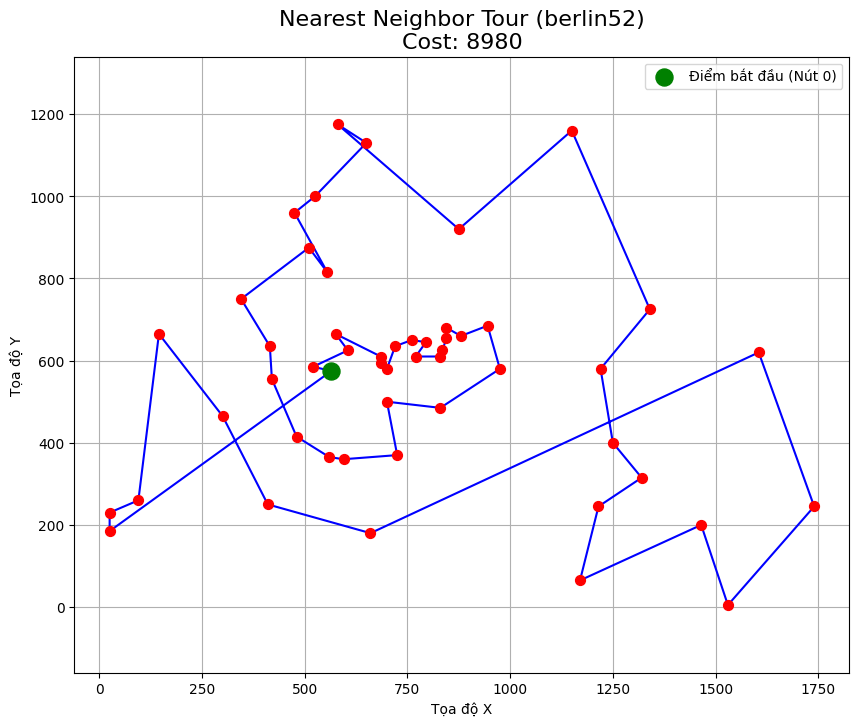

In [5]:
from utils import visualizer

print("Đang vẽ lộ trình Nearest Neighbor...")
# Vẽ kết quả của NN
visualizer.plot_tour(
    nn_tour,
    coords,
    title=f"Nearest Neighbor Tour ({name})\nCost: {nn_cost:.0f}"
)

Đang vẽ lộ trình Tối ưu (Optimum)...


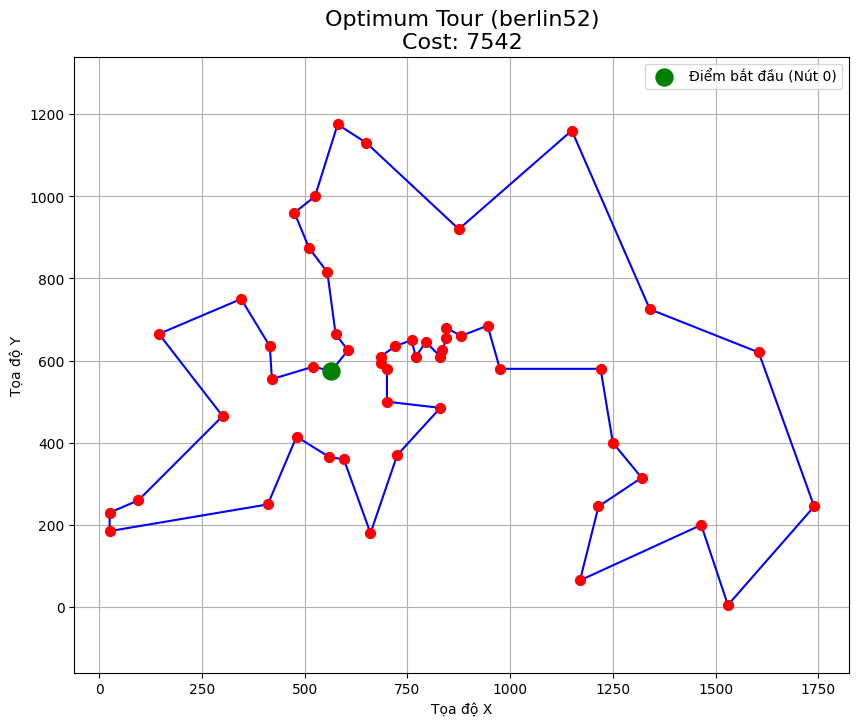

In [6]:
# Vẽ lộ trình tối ưu (nếu có) để so sánh
if opt_tour:
    print("Đang vẽ lộ trình Tối ưu (Optimum)...")
    visualizer.plot_tour(
        opt_tour,
        coords,
        title=f"Optimum Tour ({name})\nCost: {opt_cost:.0f}"
    )


## Kết luận

Nếu tất cả các ô (cell) ở trên chạy mà không có lỗi, "đường ống" (pipeline) của chúng ta đã được xác minh thành công!

Chúng ta đã chứng minh rằng:
1.  `utils/data_loader` có thể đọc `.tsp` và tạo `matrix`.
2.  `algorithms/nearest_neighbor` có thể nhận `matrix` và tạo `(tour, cost)`.
3.  `utils/evaluator` có thể tính toán chi phí chính xác.
4.  `utils/visualizer` có thể vẽ kết quả một cách trực quan.

Chúng ta đã sẵn sàng để triển khai 9 thuật toán còn lại.